En este bloque importamos todas las librerias a utilizar

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.preprocessing import StandardScaler
import plotly.express as px



#from google.colab import drive
#drive.mount('/content/drive')


1:CARGA DE DATOS

En este bloque nos preparamos paera la carga de datos definiendo nuestras rutas.

In [16]:
# ruta lucia
# ruta = "C:/Dropbox/Estudio/Upso/GRUPO-TRABAJO/Laboratorio3/Crimenes.csv"

# ruta heber
#ruta= "D:/Dropbox/Estudio/Upso/GRUPO-TRABAJO/BigData/Laboratorio3/Crimenes.csv"

# ruta viviana
#ruta="/content/drive/MyDrive/BIG_DATA/Crimenes.csv"

# ruta pastor
ruta="C:/Users/pasto/Dropbox/GRUPO-TRABAJO/BigData/Laboratorio3/Crimenes.csv"


Hacemos una previsualizacion para verificar haber cargado correctamente el csv.

In [17]:
df = pd.read_csv(ruta)
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


Se fitran los datos sin las regiones pero manteniendo el id

In [18]:
X1=df[["Asesinatos",	"Asaltos",	"Poblacion Urbana",	"Violaciones"]]
X1

,Asesinatos,Asaltos,Poblacion Urbana,Violaciones
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


Se aplica la Funcion StandardScaler al df para que tengan media cero y desviacion estandar uno.

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

In [20]:
X_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

Graficamos los los diferentes comportamientos a diferentes vaores de k, y por el metodo del codo se elije la relación mas efeiciente, entre rendimiento y costo computacional.

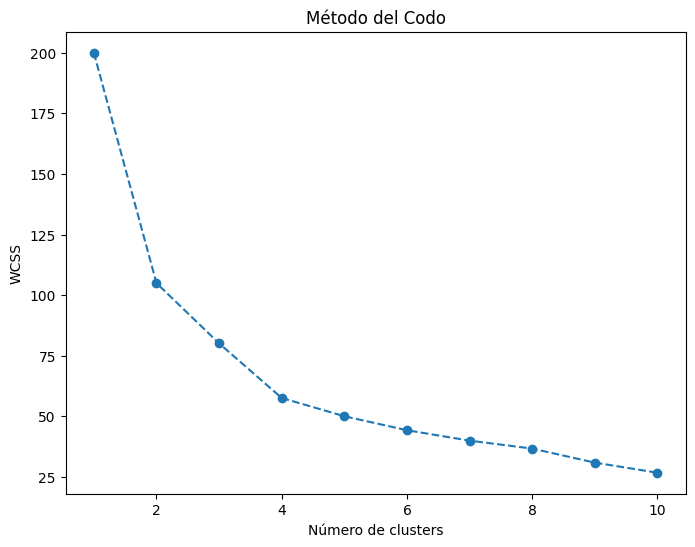

In [21]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualiza el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

Se elige el valor de k=3 que es donde el grafico muestra el codo.

Se aplica el numero 3 de cluster el KMeans

In [22]:

k_optimo = 3


kmeans = KMeans(n_clusters=k_optimo, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)




Para encontrar automáticamente el valor de k, analizamos el codo en la curva. buscando el "codo" en la gráfica, que es el punto donde la disminución en WCSS disminuye significativamente y comienza a aplanarse.

Automáticamente es encontrar el punto donde la segunda derivada de la curva es máxima.

En este caso el k fue muy alto en un promedio de 9 se prefiere usar el elegido anteriormente (graficamente) por el costo computacional.

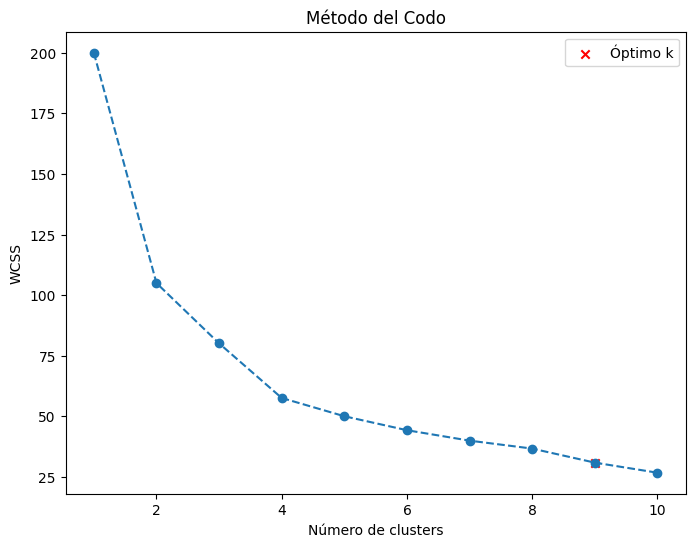

El valor óptimo de k es: 9


In [23]:
from scipy.signal import find_peaks, peak_widths

# Encuentra los picos en la curva
peaks, _ = find_peaks(-np.gradient(wcss))
# Encuentra los anchos de los picos
widths, _, _, _ = peak_widths(-np.gradient(wcss), peaks)

# Encuentra el pico más ancho, que corresponde al codo
optimal_k_index = peaks[np.argmax(widths)]

# Visualiza el método del codo con el punto óptimo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.scatter(optimal_k_index + 1, wcss[optimal_k_index], c='red', marker='x', label='Óptimo k')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.legend()
plt.show()

# Imprime el valor óptimo de k
print(f'El valor óptimo de k es: {optimal_k_index + 1}')

En los siguientes 3 pasos se obtienen las estadísticas descriptivas de la columnas Asesinatos, Asaltos y Violaciones, agrupandolos en cada grupo cluster de niveles segun cada caso.

In [24]:
cluster_asen = df.groupby('Cluster')['Asesinatos'].describe()
cluster_asen

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,20.0,12.165000,2.684904,7.9,10.3,12.15,13.50,17.4
1,16.0,5.656250,1.647207,3.2,4.3,5.95,6.90,8.5
2,14.0,3.971429,2.661529,0.8,2.2,2.65,5.35,9.7


In [25]:
cluster_asal = df.groupby('Cluster')['Asaltos'].describe()
cluster_asal

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,20.0,255.250,44.116920,178.0,229.75,254.5,280.50,337.0
1,16.0,138.875,41.175842,46.0,114.50,147.0,159.00,238.0
2,14.0,86.500,38.697545,45.0,56.25,82.0,107.25,190.0


In [26]:
cluster_viol= df.groupby('Cluster')['Violaciones'].describe()
cluster_viol

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,20.0,29.16500,8.386473,16.1,23.625,27.35,32.85,46.0
1,16.0,18.78125,5.236439,8.3,15.750,19.40,21.10,29.3
2,14.0,12.70000,3.692196,7.3,9.825,12.05,15.95,19.5


Graficamos cada nivel de cluster en el caso de Asesinatos.  clasigficando los niveles de peligrosidad por colores de mayor a menor ( rojp-amarillo-verde)

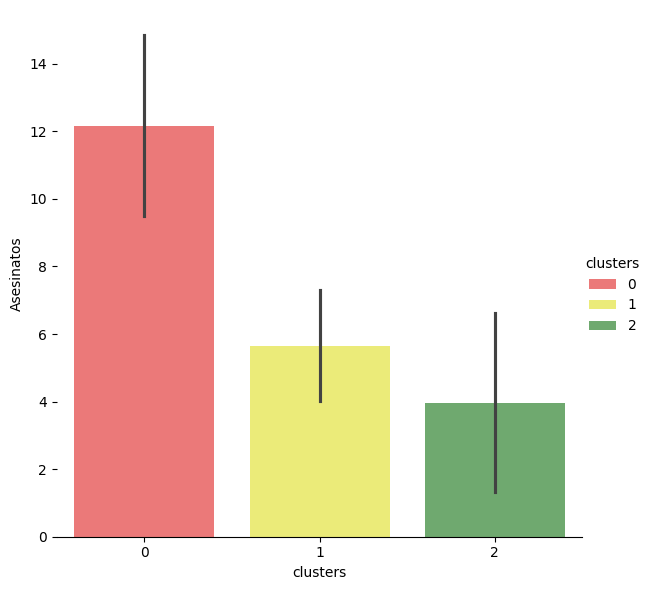

In [27]:

g = sns.catplot(
    data=df, kind="bar",
    x="Cluster", y="Asesinatos", hue="Cluster",
    errorbar="sd", palette=["red", "yellow", "green"], alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("clusters", "Asesinatos")
g.legend.set_title("clusters")

In [28]:
#cluster_stats

In [29]:
#grupo_max = cluster_stats[cluster_stats['mean'] == cluster_stats['mean'].max()].index[0]
#grupo_max

Cada grupo tendra un valor numerico diferente de cluster, para igualar conceptos generamos una columna con tre datos referentes a los cluster, ('alta','medio','bajo'), de esta manera en cada df tendremos la referencia que corresponde de igual modo en todos los graficos.

In [30]:


# Calcula las estadísticas para cada grupo
cluster_stats = df.groupby('Cluster')['Asesinatos'].describe()

# Encuentra el grupo con los mayores valores de Y
grupo_max = cluster_stats[cluster_stats['mean'] == cluster_stats['mean'].max()].index[0]

# Encuentra el grupo con los valores medios de Y
grupo_medio = cluster_stats[cluster_stats['mean'] == cluster_stats['mean'].median()].index[0]

# Encuentra el grupo con los más bajos valores de Y
grupo_min = cluster_stats[cluster_stats['mean'] == cluster_stats['mean'].min()].index[0]

# resultados
print(f"Grupo con los mayores valores: {grupo_max}")
print(f"Grupo con los valores medios: {grupo_medio}")
print(f"Grupo con los más bajos valores: {grupo_min}")

df['Categoria'] = df['Cluster'].apply(lambda x: 'bajo' if x == grupo_min else ("alta" if x==grupo_max else "medio" ))

Grupo con los mayores valores: 0
Grupo con los valores medios: 1
Grupo con los más bajos valores: 2


In [31]:
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Categoria
0,Alabama,13.2,236,58,21.2,0,alta
1,Alaska,10.0,263,48,44.5,0,alta
2,Arizona,8.1,294,80,31.0,0,alta
3,Arkansas,8.8,190,50,19.5,2,bajo
4,California,9.0,276,91,40.6,0,alta
5,Colorado,7.9,204,78,38.7,0,alta
6,Connecticut,3.3,110,77,11.1,1,medio
7,Delaware,5.9,238,72,15.8,1,medio
8,Florida,15.4,335,80,31.9,0,alta
9,Georgia,17.4,211,60,25.8,0,alta


Graficamos el df, dando colores a los niveles de alto=rojo, medio=amarillo, bajo=verde, segun como agruparon los cluster

In [32]:
# Aplicar KMeans con n_clusters=3
import plotly.express as px
#color_discrete_map1 = {0: 'red', 1: 'blue', 2: 'green'}

fig = px.scatter(df,x=df["Poblacion Urbana"] ,y=df["Asesinatos"], color="Categoria",symbol="Categoria",
                  hover_data=['Cluster'],color_discrete_map={'alta': 'red', 'media': 'yellow', 'baja': 'green'})
fig.show()



Se genera un diagrama de caja (boxplot) que representa la distribución estadística de los asesinatos en diferentes categorías y niveles de clúster. Y manteniendo los colores representativos

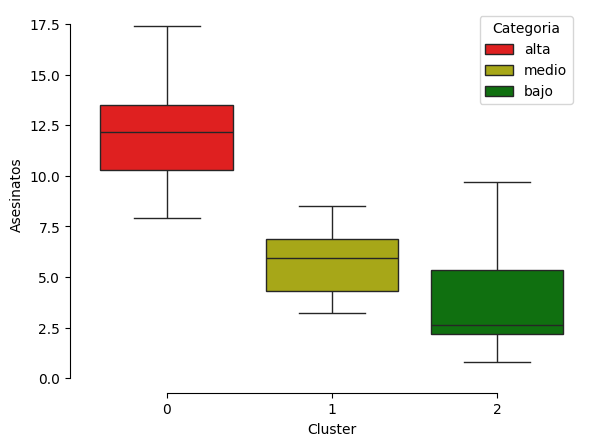

In [33]:
import seaborn as sns

sns.boxplot(x="Cluster", y="Asesinatos",
            hue="Categoria", palette=["r", "y","g"],
            data=df)
sns.despine(offset=10, trim=True)


Dado que el df contiene la informacion de cad aestado de los EEUU, se agregan un campo que hace referencia al los Codigos postales para poder representar geograficamente con colores los niveles de peligrocidad.

In [34]:
estados_usa = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
df_estados = pd.DataFrame(list(estados_usa.items()), columns=['Estado', 'Abreviatura'])
df_map=df[["Estado","Categoria"]]
df_estados["Estado"]==df_map["Estado"]
df_estados["Peligrosidad"]=df_map[["Categoria"]]
fig = px.choropleth(df_estados, locations="Abreviatura", locationmode='USA-states',color='Peligrosidad',
                    color_discrete_map={'alta': 'red', 'media': 'yellow', 'baja': 'green'},                        
                    scope="usa",  title= 'peligrosidad por Estados'
                    )

fig.show()


In [35]:
df_estados

,Estado,Abreviatura,Peligrosidad
0,Alabama,AL,alta
1,Alaska,AK,alta
2,Arizona,AZ,alta
3,Arkansas,AR,bajo
4,California,CA,alta
5,Colorado,CO,alta
6,Connecticut,CT,medio
7,Delaware,DE,medio
8,Florida,FL,alta
9,Georgia,GA,alta


In [36]:
df["Estado_Abre"]=df_estados[["Abreviatura"]]

In [37]:
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Categoria,Estado_Abre
0,Alabama,13.2,236,58,21.2,0,alta,AL
1,Alaska,10.0,263,48,44.5,0,alta,AK
2,Arizona,8.1,294,80,31.0,0,alta,AZ
3,Arkansas,8.8,190,50,19.5,2,bajo,AR
4,California,9.0,276,91,40.6,0,alta,CA
5,Colorado,7.9,204,78,38.7,0,alta,CO
6,Connecticut,3.3,110,77,11.1,1,medio,CT
7,Delaware,5.9,238,72,15.8,1,medio,DE
8,Florida,15.4,335,80,31.9,0,alta,FL
9,Georgia,17.4,211,60,25.8,0,alta,GA


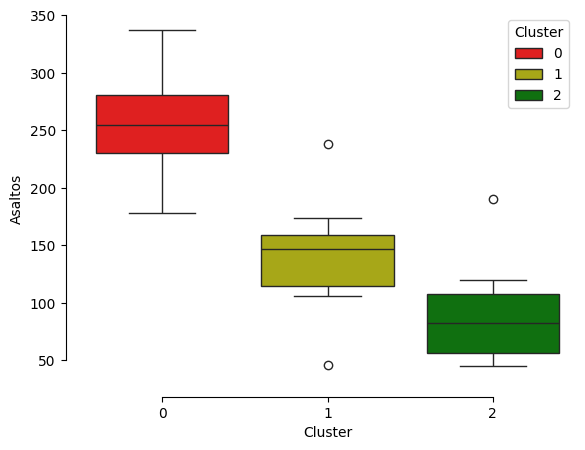

In [38]:
sns.boxplot(x="Cluster", y="Asaltos",
            hue="Cluster", palette=["r", "y","g"],
            data=df)
sns.despine(offset=10, trim=True)

<Axes: xlabel='Cluster', ylabel='Violaciones'>

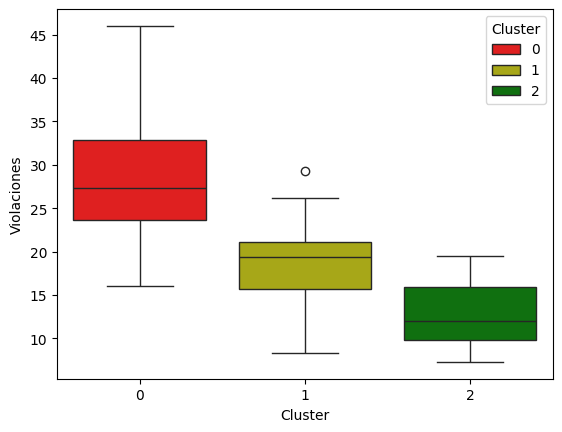

In [39]:

sns.boxplot(x="Cluster", y="Violaciones",
            hue="Cluster", palette=["r", "y","g"],
            data=df)
#sns.despine(offset=10, trim=True)

In [40]:
X2=df[[	"Asaltos",	"Poblacion Urbana"]]

In [41]:
# Escala los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)

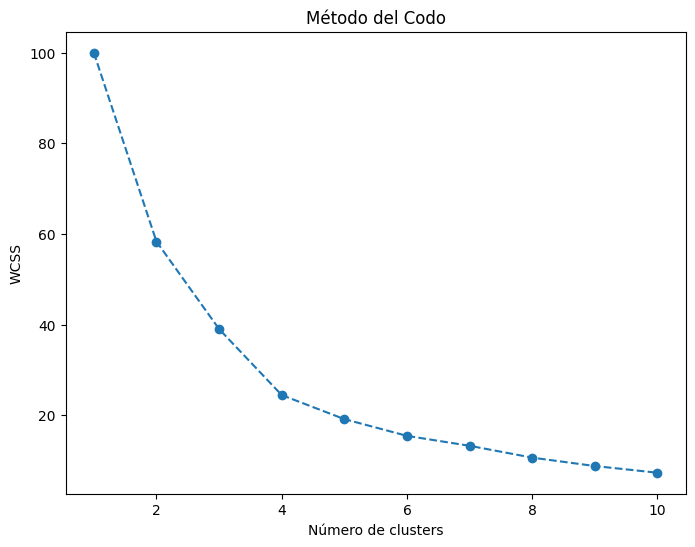

In [42]:
# Encuentra el número óptimo de clusters utilizando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualiza el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

In [43]:
# se elige el número óptimo de clusters (k)
k_optimo = 3# ajusta este valor  método del codo

# Aplica KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=k_optimo, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster2'] = kmeans.fit_predict(X_scaled)


In [44]:
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Categoria,Estado_Abre,Cluster2
0,Alabama,13.2,236,58,21.2,0,alta,AL,0
1,Alaska,10.0,263,48,44.5,0,alta,AK,0
2,Arizona,8.1,294,80,31.0,0,alta,AZ,2
3,Arkansas,8.8,190,50,19.5,2,bajo,AR,0
4,California,9.0,276,91,40.6,0,alta,CA,2
5,Colorado,7.9,204,78,38.7,0,alta,CO,2
6,Connecticut,3.3,110,77,11.1,1,medio,CT,2
7,Delaware,5.9,238,72,15.8,1,medio,DE,2
8,Florida,15.4,335,80,31.9,0,alta,FL,2
9,Georgia,17.4,211,60,25.8,0,alta,GA,0


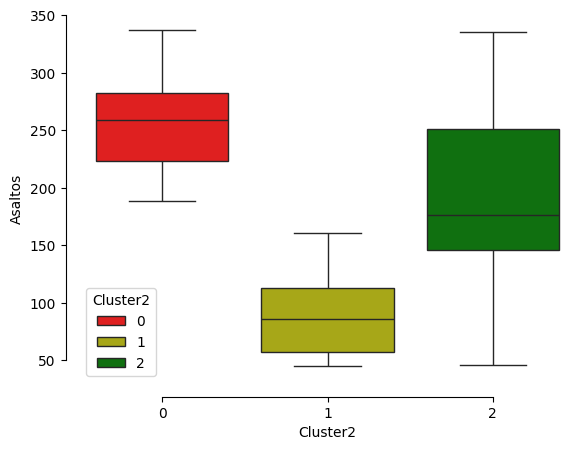

In [48]:
sns.boxplot(x="Cluster2", y="Asaltos",
            hue="Cluster2", palette=["r", "y","g"],
            data=df)
sns.despine(offset=10, trim=True)

In [46]:
cluster_asen = df.groupby('Cluster2')['Asaltos'].describe()
cluster_asen

,count,mean,std,min,25%,50%,75%,max
Cluster2,,,,,,,,
0,11.0,254.272727,46.201928,188.0,223.5,259.0,282.00,337.0
1,17.0,92.117647,35.455751,45.0,57.0,86.0,113.00,161.0
2,22.0,189.772727,72.059454,46.0,146.0,176.0,251.25,335.0


In [47]:
df["Cluster2"]=int[cluster_stats['mean'].max()]
#grupo_max = cluster_stats[cluster_stats['mean'] == cluster_stats['mean'].max()].index[0]
df

TypeError: type 'int' is not subscriptable

In [ ]:
X3=df[["Asesinatos", "Poblacion Urbana"]]

In [ ]:
# Escala los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X3)

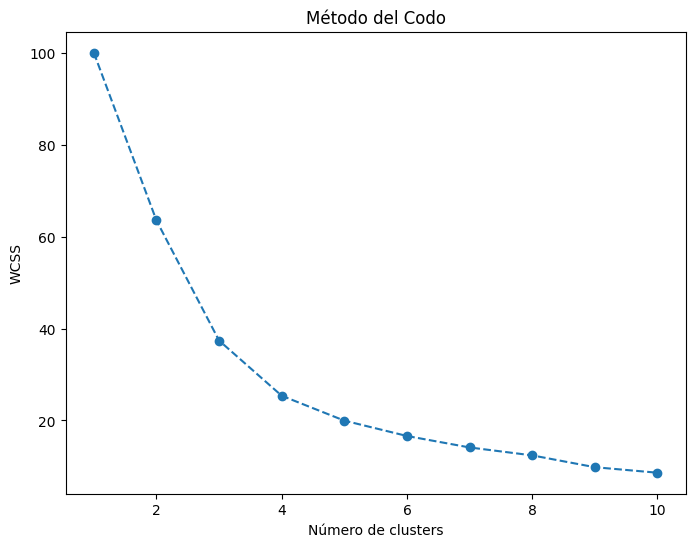

In [ ]:
# Encuentra el número óptimo de clusters utilizando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualiza el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

In [ ]:
# se elige el número óptimo de clusters (k)
k_optimo = 3# ajusta este valor  método del codo

# Aplica KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=k_optimo, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster3'] = kmeans.fit_predict(X_scaled)

In [ ]:
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Cluster2,Cluster3
0,Alabama,13.2,236,58,21.2,0,0,2
1,Alaska,10.0,263,48,44.5,0,0,2
2,Arizona,8.1,294,80,31.0,0,2,0
3,Arkansas,8.8,190,50,19.5,2,0,2
4,California,9.0,276,91,40.6,0,2,0
5,Colorado,7.9,204,78,38.7,0,2,0
6,Connecticut,3.3,110,77,11.1,1,2,0
7,Delaware,5.9,238,72,15.8,1,2,0
8,Florida,15.4,335,80,31.9,0,2,2
9,Georgia,17.4,211,60,25.8,0,0,2


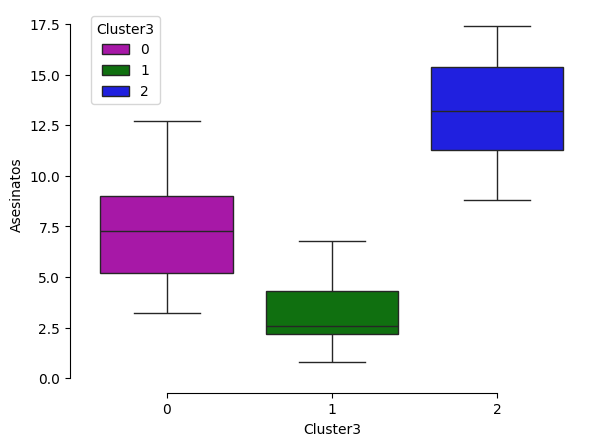

In [ ]:
sns.boxplot(x="Cluster3", y="Asesinatos",
            hue="Cluster3", palette=["m", "g","b"],
            data=df)
sns.despine(offset=10, trim=True)


In [ ]:
cluster_asen = df.groupby('Cluster3')['Asesinatos'].describe()
cluster_asen

,count,mean,std,min,25%,50%,75%,max
Cluster3,,,,,,,,
0,24.0,7.341667,2.879299,3.2,5.2,7.25,9.0,12.7
1,13.0,3.376923,1.811148,0.8,2.2,2.60,4.3,6.8
2,13.0,13.023077,2.669318,8.8,11.3,13.20,15.4,17.4


In [ ]:
X4=df[["Violaciones", "Poblacion Urbana"]]

In [ ]:
# Escala los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X4)

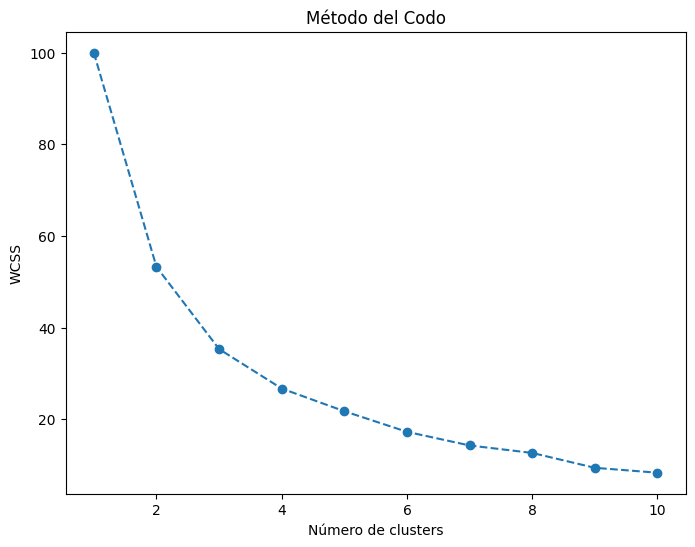

In [ ]:
# Encuentra el número óptimo de clusters utilizando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Visualiza el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

In [ ]:
# se elige el número óptimo de clusters (k)
k_optimo = 3# ajusta este valor  método del codo

# Aplica KMeans con el número óptimo de clusters
kmeans = KMeans(n_clusters=k_optimo, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster4'] = kmeans.fit_predict(X_scaled)

In [ ]:
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Cluster2,Cluster3,Cluster4
0,Alabama,13.2,236,58,21.2,0,0,2,0
1,Alaska,10.0,263,48,44.5,0,0,2,1
2,Arizona,8.1,294,80,31.0,0,2,0,1
3,Arkansas,8.8,190,50,19.5,2,0,2,0
4,California,9.0,276,91,40.6,0,2,0,1
5,Colorado,7.9,204,78,38.7,0,2,0,1
6,Connecticut,3.3,110,77,11.1,1,2,0,2
7,Delaware,5.9,238,72,15.8,1,2,0,2
8,Florida,15.4,335,80,31.9,0,2,2,1
9,Georgia,17.4,211,60,25.8,0,0,2,1


<Axes: xlabel='Cluster4', ylabel='Violaciones'>

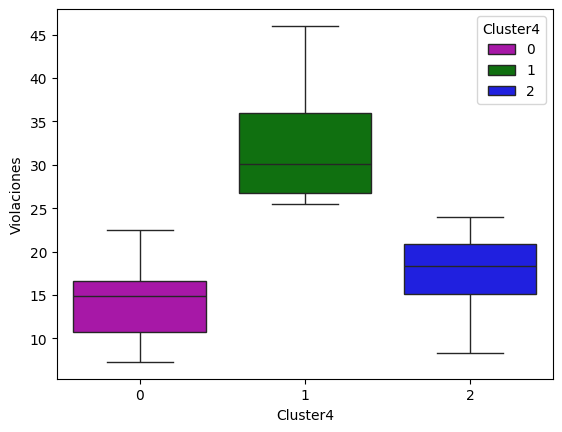

In [ ]:

sns.boxplot(x="Cluster4", y="Violaciones",
            hue="Cluster4", palette=["m", "g","b"],
            data=df)
#sns.despine(offset=10, trim=True)

In [ ]:
cluster_asen = df.groupby('Cluster4')['Violaciones'].describe()
cluster_asen

,count,mean,std,min,25%,50%,75%,max
Cluster4,,,,,,,,
0,16.0,14.256250,4.641834,7.3,10.775,14.90,16.575,22.5
1,16.0,32.231250,6.808790,25.5,26.725,30.15,36.000,46.0
2,18.0,17.655556,4.443001,8.3,15.125,18.40,20.925,24.0


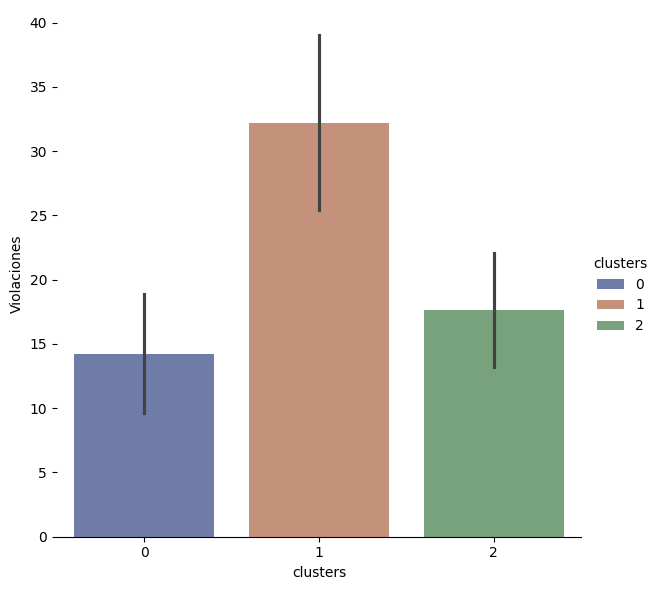

In [ ]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df, kind="bar",
    x="Cluster4", y="Violaciones", hue="Cluster4",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("clusters", "Violaciones")
g.legend.set_title("clusters")

In [ ]:
# Sumar las columnas "Cluster2", "Cluster3" y "Cluster4" en cada fila
df['Categoria'] = df[['Cluster2', 'Cluster3', 'Cluster4']].sum(axis=1)

In [ ]:
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Categoria,Cluster2,Cluster3,Cluster4
0,Alabama,13.2,236,58,21.2,0,2,0,2,0
1,Alaska,10.0,263,48,44.5,0,3,0,2,1
2,Arizona,8.1,294,80,31.0,0,3,2,0,1
3,Arkansas,8.8,190,50,19.5,2,2,0,2,0
4,California,9.0,276,91,40.6,0,3,2,0,1
5,Colorado,7.9,204,78,38.7,0,3,2,0,1
6,Connecticut,3.3,110,77,11.1,1,4,2,0,2
7,Delaware,5.9,238,72,15.8,1,4,2,0,2
8,Florida,15.4,335,80,31.9,0,5,2,2,1
9,Georgia,17.4,211,60,25.8,0,3,0,2,1


In [ ]:
# Clasificar los valores de la columna "Categoria"
df['Categoria'] = df['Categoria'].apply(lambda x: 'baja peligrosidad' if x <= 1 else 'alta peligrosidad')

In [ ]:
df

,Estado,Asesinatos,Asaltos,Poblacion Urbana,Violaciones,Cluster,Categoria,Cluster2,Cluster3,Cluster4
0,Alabama,13.2,236,58,21.2,0,alta peligrosidad,0,2,0
1,Alaska,10.0,263,48,44.5,0,alta peligrosidad,0,2,1
2,Arizona,8.1,294,80,31.0,0,alta peligrosidad,2,0,1
3,Arkansas,8.8,190,50,19.5,2,alta peligrosidad,0,2,0
4,California,9.0,276,91,40.6,0,alta peligrosidad,2,0,1
5,Colorado,7.9,204,78,38.7,0,alta peligrosidad,2,0,1
6,Connecticut,3.3,110,77,11.1,1,alta peligrosidad,2,0,2
7,Delaware,5.9,238,72,15.8,1,alta peligrosidad,2,0,2
8,Florida,15.4,335,80,31.9,0,alta peligrosidad,2,2,1
9,Georgia,17.4,211,60,25.8,0,alta peligrosidad,0,2,1


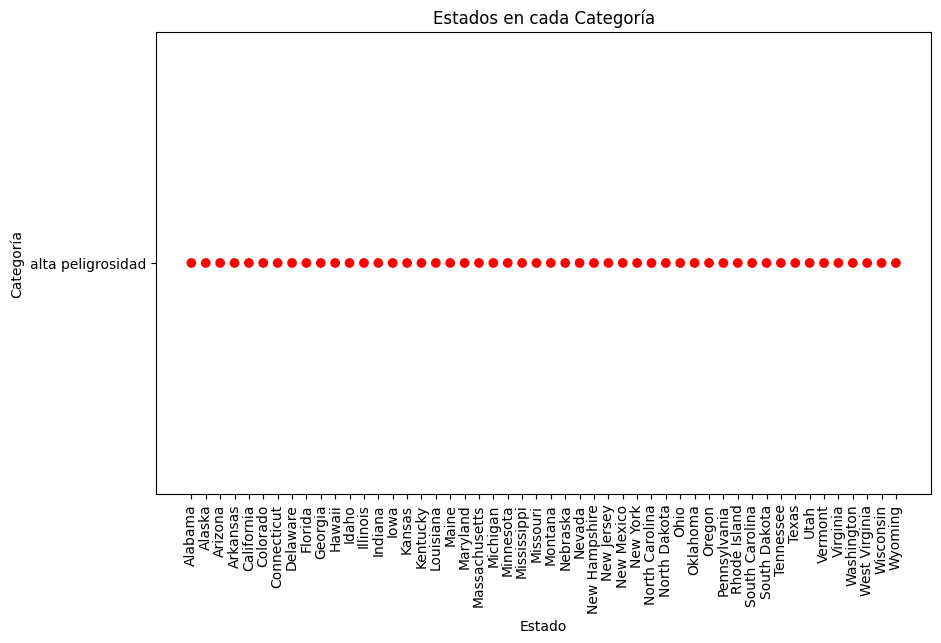

In [ ]:
colors = ['blue' if c == 0 else 'red' for c in df['Categoria']]


plt.figure(figsize=(10, 6))
plt.scatter(df['Estado'], df['Categoria'], color=colors)
plt.xticks(rotation=90)
plt.xlabel('Estado')
plt.ylabel('Categoría')
plt.title('Estados en cada Categoría')
plt.show()